In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("mpg")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
df["origin"]

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 398, dtype: object

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [5]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [6]:
Origin = pd.get_dummies(df["origin"])
Origin

,europe,japan,usa
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
393,False,False,True
394,True,False,False
395,False,False,True
396,False,False,True


In [7]:
df.drop(["origin"], axis = 1, inplace = True)
df = pd.concat([df, Origin], axis = 1)

In [8]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,False,False,True
394,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,True,False,False
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,False,False,True
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,False,False,True


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df.keys()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'name', 'europe', 'japan', 'usa'],
      dtype='object')

In [32]:
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'europe', 'japan', 'usa']]

In [33]:
y = df["mpg"]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)


In [35]:
from sklearn.svm import SVR

In [36]:
model = SVR()

In [37]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
name            0
europe          0
japan           0
usa             0
dtype: int64

In [38]:
hp_mean = df.horsepower.mean()

In [39]:

df['horsepower'] = df['horsepower'].fillna(hp_mean)

In [40]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
name            0
europe          0
japan           0
usa             0
dtype: int64

In [41]:
model.fit(x_train, y_train)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [42]:
predicted = model.predict(x_test)
predicted

array([25.64083673, 24.03399691, 25.12011513, 15.2194067 , 12.8460174 ,
       27.16310099, 18.96606815, 27.94554858, 30.13292595, 29.53584376,
       31.16018924, 16.28773249, 17.19020808, 22.94993184, 25.5829921 ,
       31.01996811, 22.94665688, 15.2708306 , 26.88053155, 28.62543438,
       24.57771928, 26.83959057, 25.10459904, 21.20554602, 13.36425781,
       27.5751646 , 19.23227344, 20.76446103, 23.89466608, 29.98696707,
       28.59835114, 21.83702962, 15.3518003 , 26.45939272, 25.1308992 ,
       27.29256152, 29.51414318, 29.06555801, 22.83999385, 26.97771432,
       20.24537802, 17.75102625, 29.04482858, 26.72525356, 21.24907946,
       24.73061386, 27.32876973, 28.88703542, 29.41666028, 28.5824734 ,
       28.84930725, 22.86351809, 19.69072849, 25.39855021, 14.18393679,
       24.54147718, 29.41240294, 13.81497878, 25.29775777, 21.33045972,
       20.07849446, 28.20137489, 14.40284228, 29.04741357, 28.48211819,
       24.96448883, 14.18727605, 13.72838932, 21.68220439, 30.54

In [43]:
y_test

206    26.5
16     18.0
339    26.6
115    15.0
95     12.0
       ... 
354    34.5
132    25.0
392    27.0
237    30.5
183    25.0
Name: mpg, Length: 160, dtype: float64

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn import metrics


In [51]:
print(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

4.777431403440964


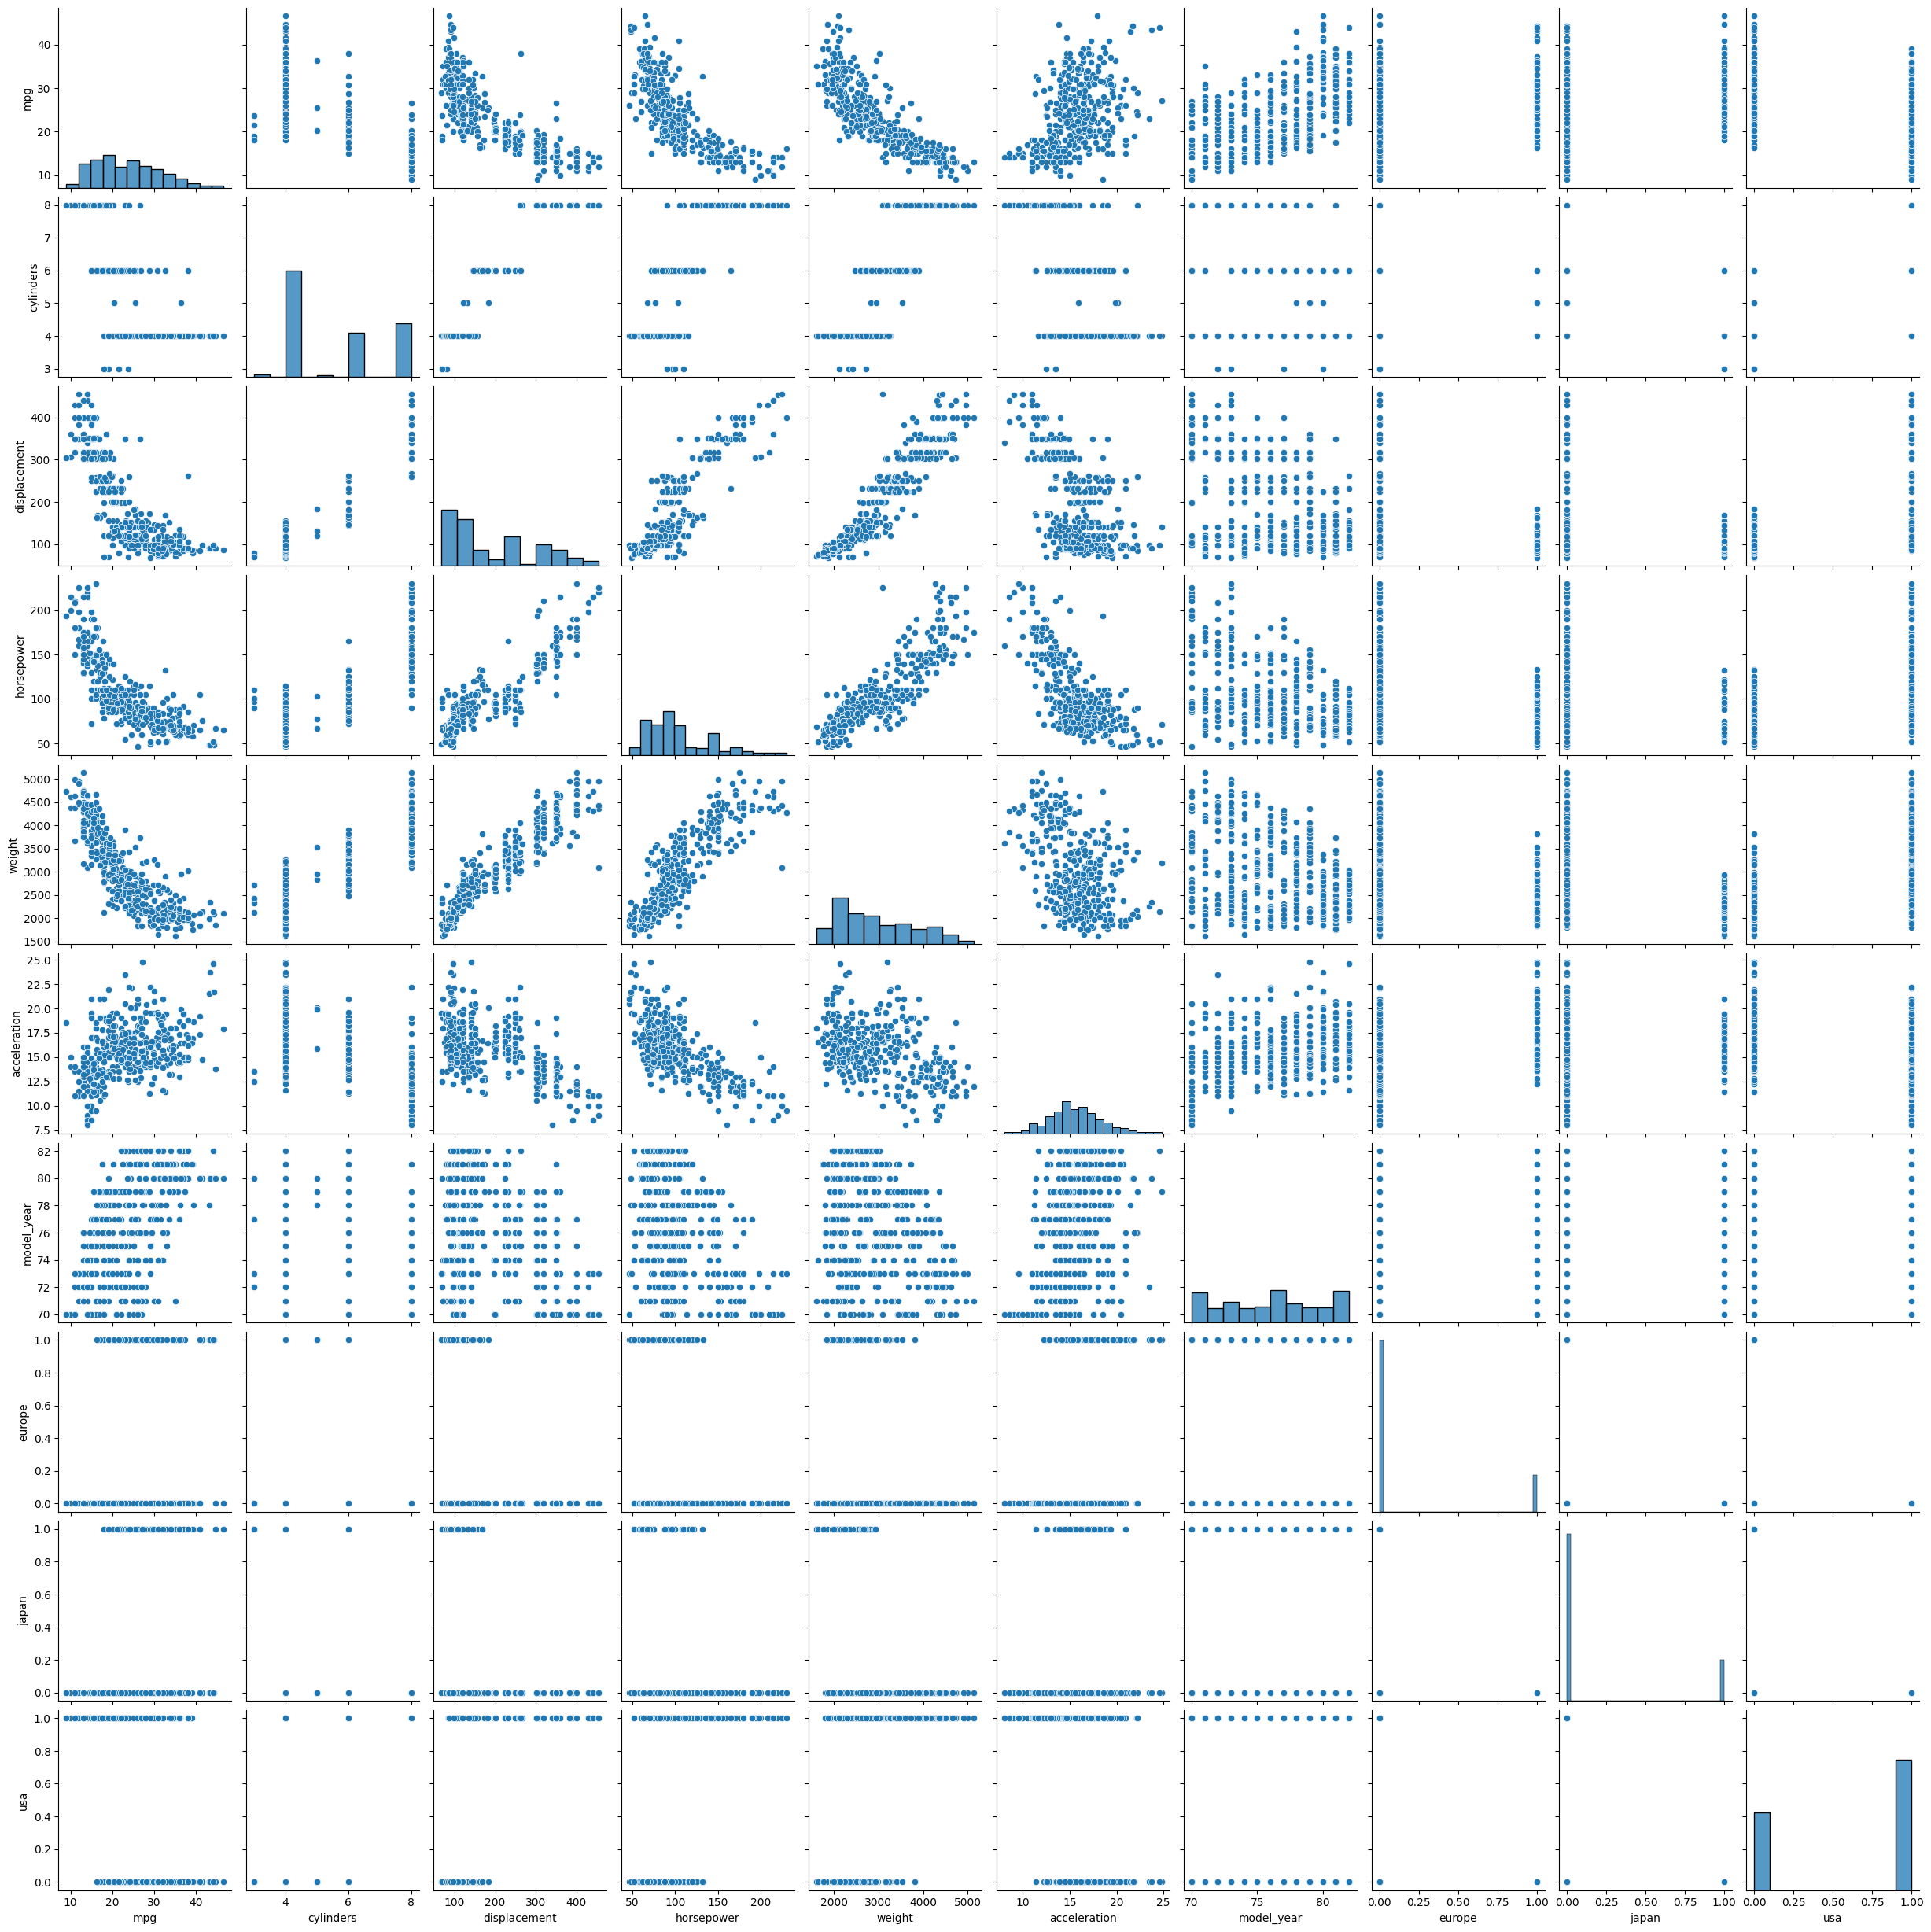

In [61]:
sns.pairplot(df)

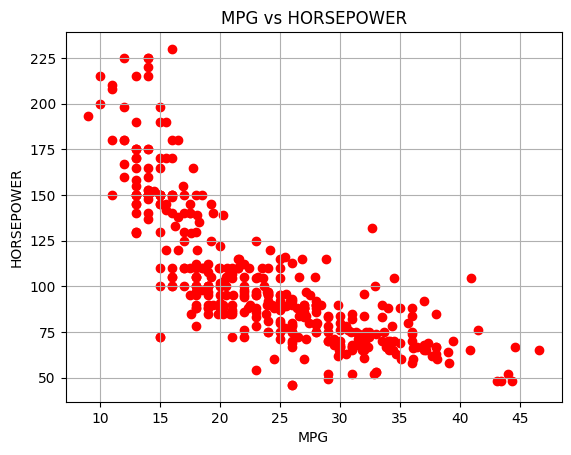

In [68]:
plt.scatter(df["mpg"], df["horsepower"], color = "red")
plt.title("MPG vs HORSEPOWER")
plt.xlabel("MPG")
plt.ylabel("HORSEPOWER")
plt.grid()
plt.show()